In [1]:
import pandas as pd

base_turismo = pd.read_excel(
    r"..\bdd\bdd_limpia\base_turismo_clean.xlsx")
base_turismo

,num_noches_durmieron,gasto_alojamiento,gasto_alimentacion,gasto_transporte,gasto_visitas,gasto_discotecas,mes_viaje,principal_actividad1,destino_principal_viaje,gasto_tot
0,0,0,20,0,0,0,Febrero,"Visita a festivales, ferias",Gualaceo,20
1,0,0,100,0,0,0,Diciembre,Visita a playas,Playas,100
2,2,0,60,0,0,0,Enero,Visita a atractivos naturales,Machala,60
3,3,0,15,20,0,0,Febrero,Visita a balnearios,Calvas,35
4,1,0,30,10,0,0,Febrero,Visita a balnearios,Paute,40
...,...,...,...,...,...,...,...,...,...,...
2146,2,0,75,0,0,0,Febrero,Actividades relacionadas con su trabajo,Quito,75
2147,0,0,40,0,0,0,Enero,Visita a atractivos naturales,Loreto,40
2148,3,0,20,32,0,0,Febrero,Visita a balnearios,Machala,52
2149,0,0,0,2,2,2,Febrero,Visita a atractivos históricos,Santo Domingo,6


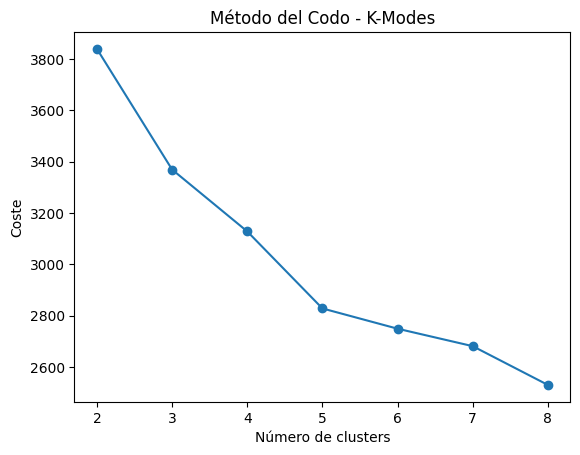

In [2]:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

# Seleccionar solo variables categóricas
categorical_cols = ["mes_viaje", "principal_actividad1", "destino_principal_viaje"]
X_cat = base_turismo[categorical_cols].copy()

cost = []
K = range(2, 9)

for k in K:
    km = KModes(n_clusters=k, init='Huang', random_state=42)
    km.fit(X_cat)
    cost.append(km.cost_)

plt.plot(K, cost, marker='o')
plt.title("Método del Codo - K-Modes")
plt.xlabel("Número de clusters")
plt.ylabel("Coste")
plt.show()

# Elegimos un K (ejemplo 3)
kmodes = KModes(n_clusters=3, init='Huang', random_state=42)
clusters_kmodes = kmodes.fit_predict(X_cat)

base_turismo['cluster_kmodes'] = clusters_kmodes


In [3]:
base_turismo

,num_noches_durmieron,gasto_alojamiento,gasto_alimentacion,gasto_transporte,gasto_visitas,gasto_discotecas,mes_viaje,principal_actividad1,destino_principal_viaje,gasto_tot,cluster_kmodes
0,0,0,20,0,0,0,Febrero,"Visita a festivales, ferias",Gualaceo,20,2
1,0,0,100,0,0,0,Diciembre,Visita a playas,Playas,100,0
2,2,0,60,0,0,0,Enero,Visita a atractivos naturales,Machala,60,0
3,3,0,15,20,0,0,Febrero,Visita a balnearios,Calvas,35,2
4,1,0,30,10,0,0,Febrero,Visita a balnearios,Paute,40,2
...,...,...,...,...,...,...,...,...,...,...,...
2146,2,0,75,0,0,0,Febrero,Actividades relacionadas con su trabajo,Quito,75,1
2147,0,0,40,0,0,0,Enero,Visita a atractivos naturales,Loreto,40,0
2148,3,0,20,32,0,0,Febrero,Visita a balnearios,Machala,52,2
2149,0,0,0,2,2,2,Febrero,Visita a atractivos históricos,Santo Domingo,6,1
